In [1]:
# Import libraries
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
from IPython import display

In [2]:
# Load the created model
model = load_model('alpha_model_2.h5')

In [3]:
# Create the array of the right shape to feed into the keras model
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

<H3>Input Image File:</H3>

In [4]:
image_path = 'test_alpha/183.jpg'

In [5]:
image = Image.open(image_path).convert('RGB')

In [6]:
# Resize the image to a 224x224:
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

In [7]:
# Turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

In [8]:
# Predict
prediction = model.predict(data)

In [9]:
labels = ['A','B','C','D','E','F','G','H','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


Sorry, since the following image is recognized with low probability (< 0.6), we ignored the result. Recognized character is: None



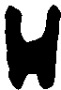

In [10]:
# Print corresponding label
for i in range(25):
    if prediction[0][i] >= 0.6:
        rec_char = labels[i]
        print()
        print('The following image is recognized as', rec_char, 'with probability of', round(prediction[0][i], 2))
        break
    elif i == 24: 
        rec_char = None
        print()
        print("Sorry, since the following image is recognized with low probability (< 0.6), we ignored the result. Recognized character is:", rec_char) 
        
# Display Image
print()
display.Image(image_path)

In [11]:
prediction[0]

array([8.8155339e-04, 9.3396206e-04, 8.8484231e-03, 5.6334760e-04,
       8.2022682e-09, 3.8052971e-05, 6.6488021e-04, 4.7884959e-01,
       3.1920638e-06, 1.5147442e-07, 6.7249517e-10, 4.9625201e-06,
       4.4528431e-08, 3.0569936e-04, 4.5967928e-01, 1.2484117e-03,
       1.3002416e-07, 1.6987508e-08, 5.1882168e-08, 3.6026732e-04,
       1.1552563e-05, 4.7606327e-02, 3.3514166e-10, 6.7572827e-08,
       6.0440981e-13], dtype=float32)